Name: Ron Keinan

ID: 203735857

All the cells I added start with "RK"

I ran all the cells in the notebook, added explanatory notes in the various questions. A specific answer to all the examiner's questions appears in the attached word file.

# Week 5 - Logistic Regression and Classification Error Metrics

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

Alternatively the same data set can be found at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/downloads/human-activity-recognition-with-smartphones.zip
The train file can be renamed as Human_Activity_Recognition_Using_Smartphones_Data.csv 

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [ ]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = '/content/gdrive/MyDrive/Machine Learning course 5783/HW_data/Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [ ]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [ ]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [ ]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [ ]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [ ]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [ ]:
# RK - You can see here that the classification of the label "activity" is object type, 
# and in practice it is a string that represents one of six situations: laying, standing, sitting, walking, walking_upstairs, walking_downstairs
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

1495    2
336     4
8989    4
9042    5
3756    4
Name: Activity, dtype: int64

In [ ]:
# RK now we can see the label 'activity' turned to numeric represantation in order to fit our models
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,2


## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [ ]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

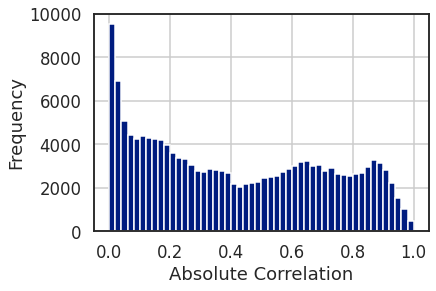

In [ ]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [ ]:
# RK - The minimal correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation<0.001')

,feature1,feature2,correlation,abs_correlation
60805,tBodyGyro-mean()-Y,fBodyGyro-std()-Y,0.001000,0.001000
42589,tBodyAccJerk-mean()-Y,fBodyBodyGyroJerkMag-meanFreq(),0.000999,0.000999
112813,tBodyGyroJerkMag-arCoeff()2,fBodyBodyGyroJerkMag-energy(),0.000991,0.000991
100103,tGravityAccMag-arCoeff()1,fBodyBodyGyroMag-maxInds,0.000989,0.000989
95631,tBodyAccMag-arCoeff()1,fBodyBodyGyroMag-maxInds,0.000989,0.000989
...,...,...,...,...
151079,fBodyGyro-maxInds-Z,"angle(tBodyAccJerkMean),gravityMean)",-0.000977,0.000977
78036,tBodyGyroJerk-mean()-Z,fBodyBodyAccJerkMag-sma(),-0.000981,0.000981
78031,tBodyGyroJerk-mean()-Z,fBodyBodyAccJerkMag-mean(),-0.000981,0.000981
101158,tBodyAccJerkMag-mean(),tBodyGyroMag-arCoeff()3,-0.000986,0.000986


*RK - Correlative properties correspond to each other, meaning the values increase/decrease respectively. Therefore, when training a model, there is no need for two features whose correlation is perfect or even very high, so one of them can be omitted and the model simplified*

## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [ ]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

*RK - The new method splits the information into a training group and a test group, while maintaining the original division of the classifications. That is, if we have a dataset divided into 3 labels equally (each label appears 33%), both the training group and the test group will have a third of each label type.
This is important to us because we have 6 different labels in unequal distribution and therefore want the model to work on data that simulates the original information.*

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

In [ ]:
# RK -
# Cs - If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4. Like in support vector machines, smaller values specify stronger regularization.
# solver - Algorithm to use in the optimization problem. Default is ‘lbfgs’.
#   For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
#   For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
#   ‘liblinear’ might be slower in LogisticRegressionCV because it does not handle warm-starting. ‘liblinear’ is limited to one-versus-rest schemes.
lr_l2_newton = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='newton-cg').fit(X_train, y_train)
lr_l2_lbfgs = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='lbfgs').fit(X_train, y_train)
lr_l2_sag = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='sag').fit(X_train, y_train)
lr_l1_saga = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga').fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [ ]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
525  0.026172 -0.006551 -0.080914 -0.186499 -0.036846  0.284638  0.000000   
365 -0.074315  0.066101 -0.107337  0.030586  0.333850 -0.248885  0.000000   
63   0.475835  1.139303 -1.100305 -0.381108 -0.689491  0.555767  0.169217   
476 -0.008739  0.044439  0.087741 -0.056861  0.018382 -0.084962  0.004871   
69   0.074975  0.036558 -0.201141  0.538509  0.068663 -0.517564  0.000000   
367 -0.253528 -0.308077 -0.269671  0.461695  0.205123  0.164458  0.272316   
510 -0.154977 -0.256015 -0.265140 -0.013253  0.486062  0.203323  0.000000   
230 -0.080280  0.014216 -0.071692  0.122329 -0.232931  0.248358 -0.200755   
487 -0.005701  0.046208  0.093463 -0.175776  0.110142 -0.068337 -0.039743   
160 -0.010714  0.028582 -0.026817 -0.050204  0.025202  0.033950  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
525  0.000000 -0.069954  0.000000  0.349551  3.889090 -0.007802 -0.007020   
365  0.000000  0.000000  0.000000  1.231985 -0.161966 -0.076735  0.197901   
63   3.092292 -1.397553  0.000000 -1.003298  1.891432  0.485251  1.118272   
476  0.319339  0.084787  0.000000  0.000000  0.265430 -0.068838  0.018186   
69   0.000000  0.000000  1.388929  0.000000 -2.096939  0.200415 -0.068822   
367  0.000000  0.000000  2.608963  0.007358  1.750060 -0.133852 -0.194610   
510  0.000000  0.000000  0.000000  0.967701  0.677860 -0.020828 -0.305216   
230  0.000000  0.000000  0.000000  0.000000  0.334919 -0.083861  0.148330   
487  0.502014  0.243976  0.000000  0.161345  0.438312 -0.069312  0.014247   
160  0.852243  0.000000  0.000000  0.000000  0.966184 -0.017567  0.198757   

                                             
            2         3         4         5  
525 -0.220352 -0.090961 -0.099821  0.425957  
365 -0.266594  0.041099  0.433383 -0.329054  
63  -1.185964 -0.429099 -0.840285  0.851823  
476  0.102785  0.009580 -0.018570 -0.043143  
69  -0.149284  0.586134  0.084425 -0.652867  
367 -0.319151  0.595988  0.045249  0.006376  
510 -0.122369 -0.147495  0.458412  0.137495  
230 -0.216747  0.131392 -0.293379  0.314265  
487  0.109044 -0.158477  0.149706 -0.045209  
160 -0.200960 -0.103290  0.007741  0.115319

Prepare six separate plots for each of the multi-class coefficients.

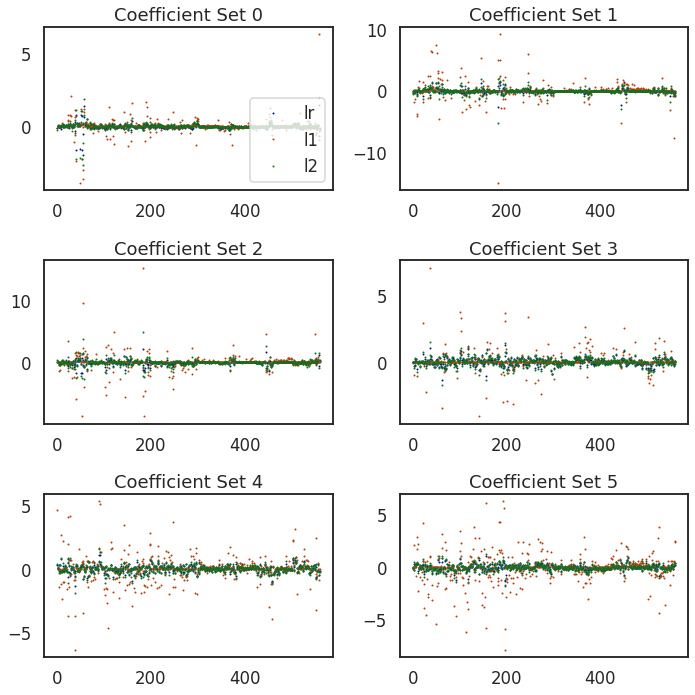

In [ ]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=1.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()


In [ ]:
# RK - with all solvers regulaizers
coefficients2 = list()

coeff_labels2 = ['lr', 'l1', 'l2', 'lr_l2_newton', 'lr_l2_lbfgs', 'lr_l2_sag', 'lr_l1_saga']
coeff_models2 = [lr, lr_l1, lr_l2, lr_l2_newton, lr_l2_lbfgs, lr_l2_sag, lr_l1_saga]

for lab,mod in zip(coeff_labels2, coeff_models2):
    coeffs2 = mod.coef_
    coeff_label2 = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients2.append(pd.DataFrame(coeffs2.T, columns=coeff_label2))

coefficients2 = pd.concat(coefficients2, axis=1)

coefficients2.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
145  0.113703  1.261324 -1.171132  0.149803 -0.505068  0.151368 -0.373120   
174  0.083557  0.047242 -0.056888  0.160337  0.130629 -0.364876  0.006583   
285 -0.121532 -0.128653 -0.084586  0.059568  0.037693  0.237509  0.000000   
346 -0.083292  0.031247 -0.110832  0.103684  0.291608 -0.232415  0.000000   
271 -0.078045 -0.211879 -0.121067 -0.160586  0.227205  0.344372  0.000000   
243  0.087441  0.052655 -0.281974 -0.444457  0.049520  0.536814  0.036632   
370  0.116537 -0.069926  0.065350  0.260774 -0.075213 -0.297521  0.000000   
557  0.059969 -0.083700  0.108785 -0.028920 -0.195661  0.139527  0.000000   
265 -0.077070 -0.188735 -0.092090 -0.159005  0.206243  0.310658  0.020485   
460 -0.016503  0.069370  0.013340 -0.075756  0.149481 -0.139933  0.000000   

                                   ... lr_l2_sag                      \
            1         2         3  ...         2         3         4   
145  5.367225 -5.592105  0.000000  ... -2.436457  0.031457 -0.788304   
174  0.000000 -0.228387  0.000000  ... -0.406579  0.278391  0.290489   
285  0.000000  0.000000  0.000000  ... -0.072342  0.131788 -0.063527   
346  0.000000  0.000000  0.000000  ... -0.328576  0.111993  0.487158   
271 -1.242163 -0.567952  0.000000  ... -0.049280 -0.312570  0.271995   
243  0.000000 -1.363092  0.000000  ... -1.326905 -0.471909  0.168201   
370 -0.012515  0.090170  1.065798  ...  0.065044  0.510812 -0.156736   
557 -0.667767  0.867801 -0.088027  ...  0.504151 -0.149163 -0.203754   
265 -0.554214  0.000000  0.000000  ...  0.019111 -0.287003  0.233194   
460  0.984220  0.003397  0.003605  ... -0.155696 -0.003398  0.235847   

              lr_l1_saga                                                    
            5          0         1         2         3         4         5  
145  0.380455   0.259814  2.011917 -2.027847 -0.021365 -0.673217  0.261898  
174 -0.607504   0.083635  0.198019 -0.298281  0.114788  0.164763 -0.462768  
285  0.292838  -0.038904 -0.061449 -0.003266  0.047869 -0.082080  0.233350  
346 -0.378251  -0.050696  0.108534 -0.125699  0.021679  0.600454 -0.260910  
271  0.579207  -0.000338 -0.316632  0.047247 -0.144973  0.043599  0.599349  
243  0.651620   0.091130  0.611695 -0.959617 -0.390971  0.163034  0.842733  
370 -0.452674   0.115293 -0.201607  0.027853  0.233702 -0.090947 -0.235727  
557  0.282060   0.002207 -0.430725  0.433931 -0.087320 -0.144783  0.303997  
265  0.503553  -0.006286 -0.264558  0.068105 -0.122727  0.042075  0.375971  
460 -0.201863  -0.059906  0.116655 -0.069166  0.012913  0.089864 -0.083950  

[10 rows x 42 columns]

## Question 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [ ]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()


,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [ ]:
y_prob.head()

,lr,l1,l2
0,0.999995,0.998910,0.999998
1,0.999237,0.999538,0.999694
2,0.997380,0.995222,0.999046
3,0.988755,0.999214,0.997587
4,0.995029,0.999918,0.999342


In [ ]:
# RK - prediction of the expanded models

y_pred2 = list()
y_prob2 = list()

coeff_labels2 = ['lr', 'l1', 'l2', 'lr_l2_newton', 'lr_l2_lbfgs', 'lr_l2_sag', 'lr_l1_saga']
coeff_models2 = [lr, lr_l1, lr_l2, lr_l2_newton, lr_l2_lbfgs, lr_l2_sag, lr_l1_saga]

for lab,mod in zip(coeff_labels2, coeff_models2):
    y_pred2.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob2.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred2 = pd.concat(y_pred2, axis=1)
y_prob2 = pd.concat(y_prob2, axis=1)

y_pred2.head()


,lr,l1,l2,lr_l2_newton,lr_l2_lbfgs,lr_l2_sag,lr_l1_saga
0,3,3,3,3,3,3,3
1,5,5,5,5,5,5,5
2,3,3,3,3,3,3,3
3,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0


In [ ]:
# RK - 
y_prob2.head()

,lr,l1,l2,lr_l2_newton,lr_l2_lbfgs,lr_l2_sag,lr_l1_saga
0,0.999995,0.998910,0.999998,0.999999,0.999998,1.000000,1.000000
1,0.999237,0.999538,0.999694,0.999650,0.999694,0.999976,0.999976
2,0.997380,0.995222,0.999046,0.998874,0.999046,0.999851,0.999878
3,0.988755,0.999214,0.997587,0.997837,0.997587,0.999779,0.999626
4,0.995029,0.999918,0.999342,0.999326,0.999342,0.999872,0.999626


## Question 7

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [ ]:
#Run the metrics
metrics

,lr,l1,l2
precision,0.980246,0.983514,0.984132
recall,0.980259,0.983495,0.984142
fscore,0.980248,0.983492,0.984136
accuracy,0.980259,0.983495,0.984142
auc,0.988042,0.989949,0.990369


In [ ]:
# RK - with expanded models

metrics2 = list()
cm2 = dict()

for lab in coeff_labels2:

    # Preciision, recall, f-score from the multi-class support function
    precision2, recall2, fscore2, _2 = score(y_test, y_pred2[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy2 = accuracy_score(y_test, y_pred2[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc2 = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred2[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm2[lab] = confusion_matrix(y_test, y_pred2[lab])
    
    metrics2.append(pd.Series({'precision':precision2, 'recall':recall2, 
                              'fscore':fscore2, 'accuracy':accuracy2,
                              'auc':auc2}, 
                             name=lab))

metrics2 = pd.concat(metrics2, axis=1)


In [ ]:
# RK - Run the metrics for expanded 
metrics2

,lr,l1,l2,lr_l2_newton,lr_l2_lbfgs,lr_l2_sag,lr_l1_saga
precision,0.980246,0.983514,0.984132,0.983485,0.984132,0.984456,0.983810
recall,0.980259,0.983495,0.984142,0.983495,0.984142,0.984466,0.983819
fscore,0.980248,0.983492,0.984136,0.983488,0.984136,0.984459,0.983812
accuracy,0.980259,0.983495,0.984142,0.983495,0.984142,0.984466,0.983819
auc,0.988042,0.989949,0.990369,0.989983,0.990369,0.990564,0.990162


## Question 8

Display or plot the confusion matrix for each model.

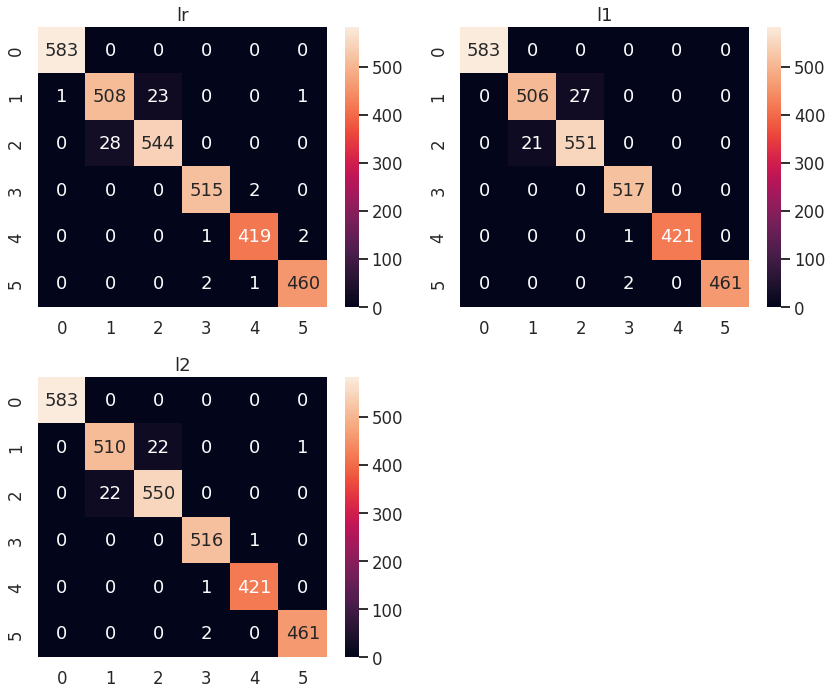

In [ ]:

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()


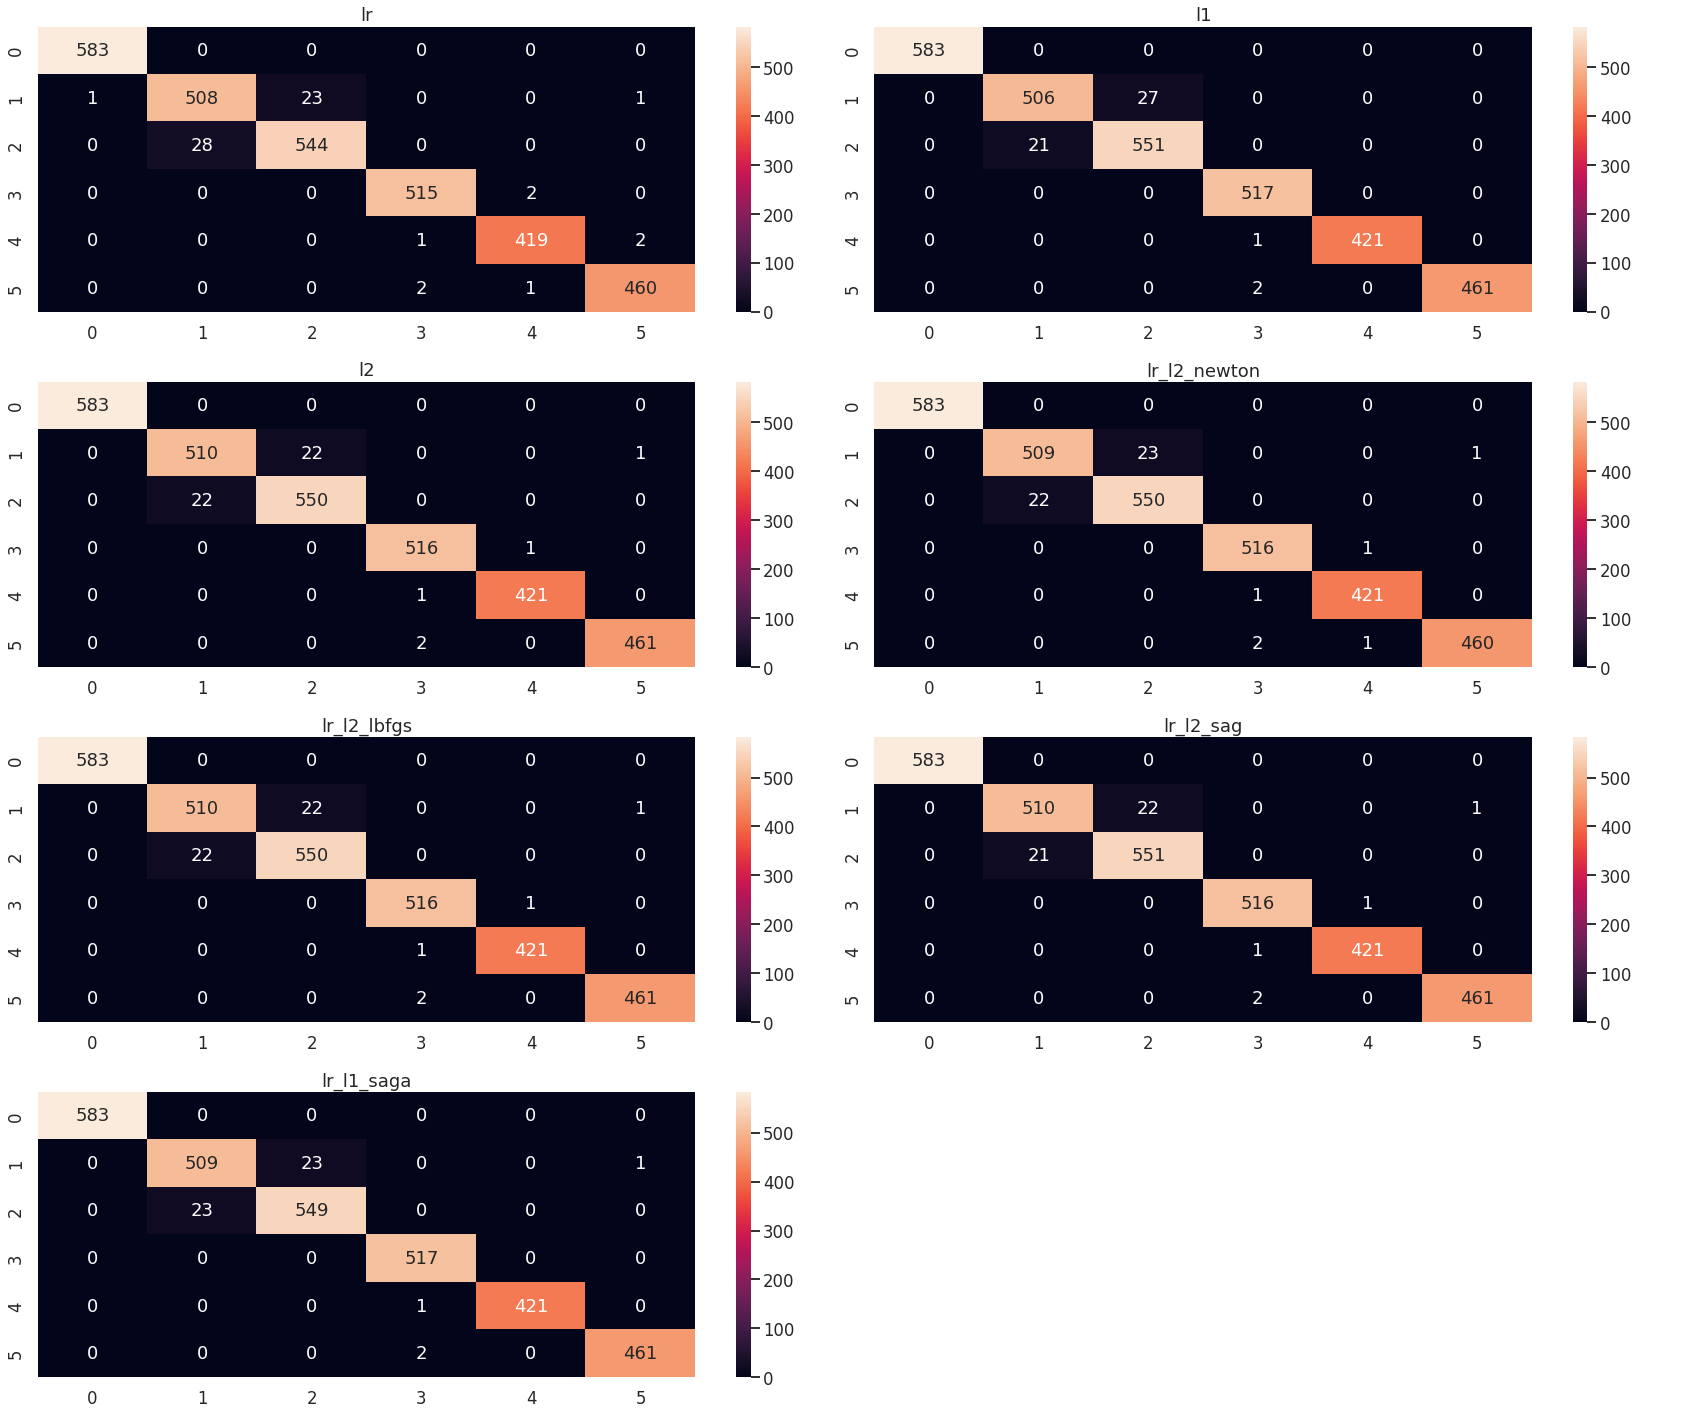

In [ ]:
# RK - confusion matrix to expanded models
fig2, axList2 = plt.subplots(nrows=4, ncols=2)
axList2 = axList2.flatten()
fig2.set_size_inches(24, 20)

axList2[-1].axis('off')

for ax,lab in zip(axList2[:-1], coeff_labels2):
    sns.heatmap(cm2[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

## Question 9
 Identify highly correlated columns and drop those columns before building models

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data2 = pd.concat([X_train,X_test])
data_new = pd.DataFrame(sel.fit_transform(data2))


data_y = pd.concat([y_train,y_test])

from sklearn.model_selection import train_test_split

X_new,X_test_new = train_test_split(data_new)
Y_new,Y_test_new = train_test_split(data_y)

 Repeat Model building with new training data after removing higly correlated columns

In [ ]:
# RK - Try standard, L1 and L2 Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#Standard logistic regression
lr_new = LogisticRegression().fit(X_new, Y_new)
#L1 logistic regression
lr_l1_new = LogisticRegressionCV(Cs = 10, cv = 4, penalty = 'l1', solver = 'liblinear').fit(X_new,Y_new)
#L2 logistic regression
lr_l2_new = LogisticRegressionCV(Cs = 10, cv = 4, penalty = 'l2', solver = 'liblinear').fit(X_new,Y_new)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

## Question 10

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [ ]:
# RK - Combine all the coefficients into a dataframe for comparison
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr_new, lr_l1_new, lr_l2_new]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                     l1            \
           0         1         2         3         4         5    0    1    2   
43 -0.271845  0.054181  0.016523 -0.506048  0.250529  0.456660  0.0  0.0  0.0   
3  -0.166477  0.024190 -0.056072  0.187191  0.026754 -0.015587  0.0  0.0  0.0   
38 -0.075800 -0.084884  0.030615  0.278740  0.173012 -0.321683  0.0  0.0  0.0   
9  -0.009757  0.061982 -0.067415  0.006093 -0.002767  0.011865  0.0  0.0  0.0   
28 -0.494394  0.158874  0.238469 -0.057192 -0.062433  0.216676  0.0  0.0  0.0   
10  0.059302 -0.049003 -0.067101  0.063888  0.007601 -0.014686  0.0  0.0  0.0   
29  0.074227 -0.109342 -0.190430 -0.177853  0.328104  0.075294  0.0  0.0  0.0   
44  0.388110  0.204650 -0.576069  0.336646 -0.253030 -0.100308  0.0  0.0  0.0   
39 -0.022299 -0.163864 -0.206934  0.204692  0.181988  0.006418  0.0  0.0  0.0   
24 -0.029410 -0.054698  0.027996  0.107128 -0.038058 -0.012958  0.0  0.0  0.0   

                         l2                                                    
      3    4    5         0         1         2         3         4         5  
43  0.0  0.0  0.0 -0.039227 -0.034258 -0.045399 -0.046958 -0.046353 -0.025622  
3   0.0  0.0  0.0  0.077059  0.105097  0.102672  0.111603  0.118181  0.109933  
38  0.0  0.0  0.0 -0.000793 -0.039642 -0.039716 -0.035417 -0.047485 -0.042748  
9   0.0  0.0  0.0 -0.056183  0.002392 -0.089843 -0.028852 -0.041691 -0.039760  
28  0.0  0.0  0.0 -0.135264 -0.109563 -0.071554 -0.093298 -0.100852 -0.113860  
10  0.0  0.0  0.0  0.069793 -0.018609 -0.027692  0.069948  0.032245  0.013884  
29  0.0  0.0  0.0  0.106108  0.087443  0.074678  0.070403  0.110462  0.101989  
44  0.0  0.0  0.0  0.025885  0.006521 -0.016446  0.013024 -0.011800 -0.006459  
39  0.0  0.0  0.0  0.032611  0.037118  0.051881  0.058076  0.034804  0.017719  
24  0.0  0.0  0.0  0.070636  0.092372  0.099211  0.102393  0.110196  0.101972

Prepare six separate plots for each of the multi-class coefficients.

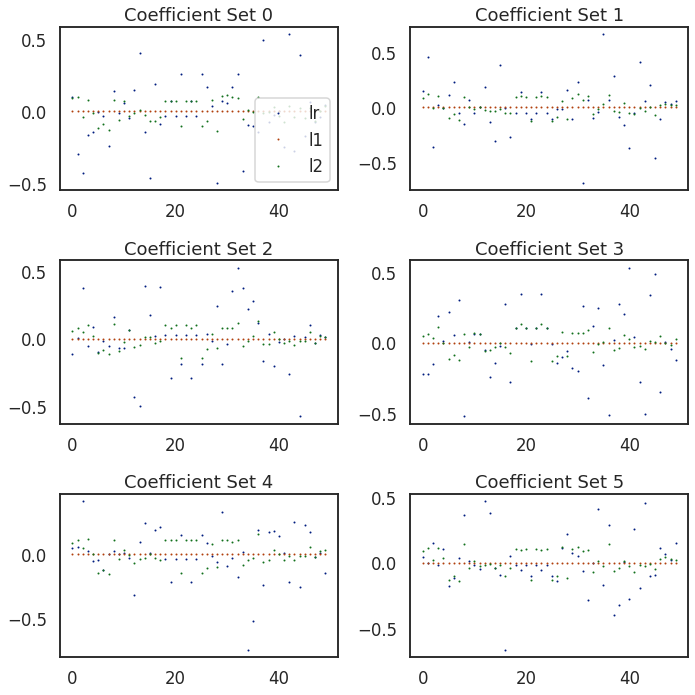

In [ ]:
# RK - try the plots
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=1.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

## Question 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [ ]:
# RK - Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr_new, lr_l1_new, lr_l2_new]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()


## Question 12

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [ ]:
# RK - Calculate the error metrics as listed above
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(Y_new_, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [ ]:
#RK - Run the metrics
metrices

## Question 13

Display or plot the confusion matrix for each model.

In [ ]:
#RK - plot the confusion matrix

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [ ]:
# RK - Perform a comparison of the outputs between Question 7 and 12 and give your observation

In [ ]:
# RK - Perform a comparison of the outputs between Question 8 and 13 and give your observation